# Дипломное задание по профессии
# «Data Scientist»

### это 2 из 3 файлов дипломного задания

## Дополнительное задание:
Вы справились с исследованием данных! 

Ваша стажировка продолжается, в мире произошли непредвиденные события — пандемия COVID-19. 

Вам доверена срочная задача. 

Чтобы сформировать понимание о стратегии компании, необходимо определить возможные сценарии дальнейшего развития событий.


# 11. Загрузите файл dip_hw_covid.csv в pandas dataframe

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

from tqdm.notebook import tqdm

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme (style = 'darkgrid')

## Доп. датасет содержит информацию о распространении COVID-19 в России и США:

date — дата фиксации значений;

country — страна;

confirmed — заражений зафиксировано;

deaths — смертей зафиксировано.

In [2]:
# !wget 'https://u.netology.ru/backend/uploads/lms/attachments/files/data/51888/dip_hw_covid.csv' -O dip_hw_covid.csv

In [3]:
df = pd.read_csv('dip_hw_covid.csv')
df

,date,country,confirmed,deaths
0,2020-01-22 00:00:00,Russia,0.0,0.0
1,2020-01-22 00:00:00,US,1.0,0.0
2,2020-01-23 00:00:00,Russia,0.0,0.0
3,2020-01-23 00:00:00,US,1.0,0.0
4,2020-01-24 00:00:00,Russia,0.0,0.0
...,...,...,...,...
1115,2021-08-01 00:00:00,US,35003417.0,613228.0
1116,NaN,NaN,NaN,NaN
1117,NaN,NaN,NaN,NaN
1118,NaN,NaN,NaN,NaN


# 12. Исследуйте данные:
* Рассчитайте коэффициент корреляции между заболеваемостью и смертностью
* Визуализируйте динамики заболеваемости и смертности по доступным странам в отдельности, сравните характер распространения

In [4]:
# Посмотреть пропуски

def prop(data = df, p = 1):

    pr = pd.DataFrame([])
    col = []
    pp = []
    pc = []
    tp = []

    for c in data:
        col.append(c)
        pp.append(data[c].isna().sum())
        pc.append(round(100 * data[c].isna().sum() / len(data), 2))
        tp.append(data.dtypes[c])

    pr[f'Entries: {len(data)}'] = col
    pr['SUM_Null'] = pp
    pr['%_Null'] = pc
    pr['Dtype'] = tp

    if p == 0:
        return pr

    return pr[pr['SUM_Null'] != 0]

In [5]:
prop(df, 0)

,Entries: 1120,SUM_Null,%_Null,Dtype
0,date,4,0.36,object
1,country,4,0.36,object
2,confirmed,4,0.36,float64
3,deaths,4,0.36,float64


---

Как мы видим имеется по 4 пропуска в каждом столбце.

Удалим их.

---

In [6]:
df = df.dropna()
prop(df, 0)

,Entries: 1116,SUM_Null,%_Null,Dtype
0,date,0,0.0,object
1,country,0,0.0,object
2,confirmed,0,0.0,float64
3,deaths,0,0.0,float64


In [57]:
# Посмотреть информацию по всем значениям

def data(data = df):

    print('-------------------------------------\nКоличество данных -', len(data))
    print('-------------------------------------\nКоличество дубликатов -', data.duplicated().sum())

    for d in data:
        print('\n-------------------------------------\n', 'Столбец -', d, '||', 
              'Кол-во уникальных значений -', len(data[d].unique()), '||',  
              'Кол-во дубликатов -', data[d].duplicated().sum())
        print('\nУникальные значения:')
        print(np.sort(data[d].unique()))

In [58]:
data(df)

-------------------------------------
Количество данных - 1116
-------------------------------------
Количество дубликатов - 0

-------------------------------------
 Столбец - date || Кол-во уникальных значений - 558 || Кол-во дубликатов - 558

Уникальные значения:
['2020-01-22T00:00:00.000000000' '2020-01-23T00:00:00.000000000'
 '2020-01-24T00:00:00.000000000' '2020-01-25T00:00:00.000000000'
 '2020-01-26T00:00:00.000000000' '2020-01-27T00:00:00.000000000'
 '2020-01-28T00:00:00.000000000' '2020-01-29T00:00:00.000000000'
 '2020-01-30T00:00:00.000000000' '2020-01-31T00:00:00.000000000'
 '2020-02-01T00:00:00.000000000' '2020-02-02T00:00:00.000000000'
 '2020-02-03T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-02-05T00:00:00.000000000' '2020-02-06T00:00:00.000000000'
 '2020-02-07T00:00:00.000000000' '2020-02-08T00:00:00.000000000'
 '2020-02-09T00:00:00.000000000' '2020-02-10T00:00:00.000000000'
 '2020-02-11T00:00:00.000000000' '2020-02-12T00:00:00.000000000'
 '2020-02-13T00:00

---

На первый взгляд ошибок в данных нет.

Дубликаты также отсутствуют.

Посмотрим на данные более подробно.

---

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
df['date'] = pd.to_datetime(df['date'])
df

,date,country,confirmed,deaths
0,2020-01-22,Russia,0.0,0.0
1,2020-01-22,US,1.0,0.0
2,2020-01-23,Russia,0.0,0.0
3,2020-01-23,US,1.0,0.0
4,2020-01-24,Russia,0.0,0.0
...,...,...,...,...
1111,2021-07-30,US,34945468.0,613013.0
1112,2021-07-31,Russia,6185249.0,155952.0
1113,2021-07-31,US,34978276.0,613157.0
1114,2021-08-01,Russia,6207513.0,156726.0


In [10]:
34978276.0 / 6185249.0

5.655112025401079

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1116 entries, 0 to 1115
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1116 non-null   datetime64[ns]
 1   country    1116 non-null   object        
 2   confirmed  1116 non-null   float64       
 3   deaths     1116 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 43.6+ KB


In [12]:
rus = df[df['country'] == 'Russia']
rus

,date,country,confirmed,deaths
0,2020-01-22,Russia,0.0,0.0
2,2020-01-23,Russia,0.0,0.0
4,2020-01-24,Russia,0.0,0.0
6,2020-01-25,Russia,0.0,0.0
8,2020-01-26,Russia,0.0,0.0
...,...,...,...,...
1106,2021-07-28,Russia,6116249.0,153620.0
1108,2021-07-29,Russia,6138969.0,154404.0
1110,2021-07-30,Russia,6161985.0,155180.0
1112,2021-07-31,Russia,6185249.0,155952.0


In [13]:
us = df[df['country'] == 'US']
us

,date,country,confirmed,deaths
1,2020-01-22,US,1.0,0.0
3,2020-01-23,US,1.0,0.0
5,2020-01-24,US,2.0,0.0
7,2020-01-25,US,2.0,0.0
9,2020-01-26,US,5.0,0.0
...,...,...,...,...
1107,2021-07-28,US,34672690.0,611803.0
1109,2021-07-29,US,34750860.0,612124.0
1111,2021-07-30,US,34945468.0,613013.0
1113,2021-07-31,US,34978276.0,613157.0


In [14]:
df.describe()

,date,confirmed,deaths
count,1116,1.116000e+03,1116.000000
mean,2020-10-26 12:00:00,8.508892e+06,169543.963262
min,2020-01-22 00:00:00,0.000000e+00,0.000000
25%,2020-06-09 00:00:00,8.245898e+05,15199.000000
50%,2020-10-26 12:00:00,3.840895e+06,98314.000000
75%,2021-03-15 00:00:00,8.748694e+06,226763.000000
max,2021-08-01 00:00:00,3.500342e+07,613228.000000
std,NaN,1.130533e+07,198133.420131


In [15]:
rus.describe()

,date,confirmed,deaths
count,558,5.580000e+02,558.000000
mean,2020-10-26 12:00:00,2.300445e+06,48404.983871
min,2020-01-22 00:00:00,0.000000e+00,0.000000
25%,2020-06-09 06:00:00,4.867282e+05,6188.000000
50%,2020-10-26 12:00:00,1.528971e+06,26250.500000
75%,2021-03-14 18:00:00,4.348391e+06,90858.000000
max,2021-08-01 00:00:00,6.207513e+06,156726.000000
std,NaN,2.010516e+06,47780.244038


In [16]:
us.describe()

,date,confirmed,deaths
count,558,5.580000e+02,558.000000
mean,2020-10-26 12:00:00,1.471734e+07,290682.942652
min,2020-01-22 00:00:00,1.000000e+00,0.000000
25%,2020-06-09 06:00:00,1.984974e+06,115109.250000
50%,2020-10-26 12:00:00,8.767904e+06,227006.000000
75%,2021-03-14 18:00:00,2.948581e+07,536045.000000
max,2021-08-01 00:00:00,3.500342e+07,613228.000000
std,NaN,1.321288e+07,216562.312760


In [17]:
np.corrcoef(rus['confirmed'], rus['deaths'])[0, 1]

0.9899097893370321

In [18]:
np.corrcoef(us['confirmed'], us['deaths'])[0, 1]

0.9912622670385342

In [19]:
331449281 / 146748590

2.258619868170454

---

При первом рассмотрении распределения данных мы видим, что в США болезнь протекала на много хуже, чем в России.

Если учесть тот факт, что в 2020 году население России составляло 146 748 590, а в США 331 449 281, это получается, что население США больше в 2.26 населения России.

По данным распределения, мы видим, что количество больных и смертей в США больше в 5 – 10 раз чем в России.

Коэффициенты корреляции показывают очень сильную зависимость смертности от общего количества заболевших. В России 0.9899. В США чуть больше 0.9912.

---

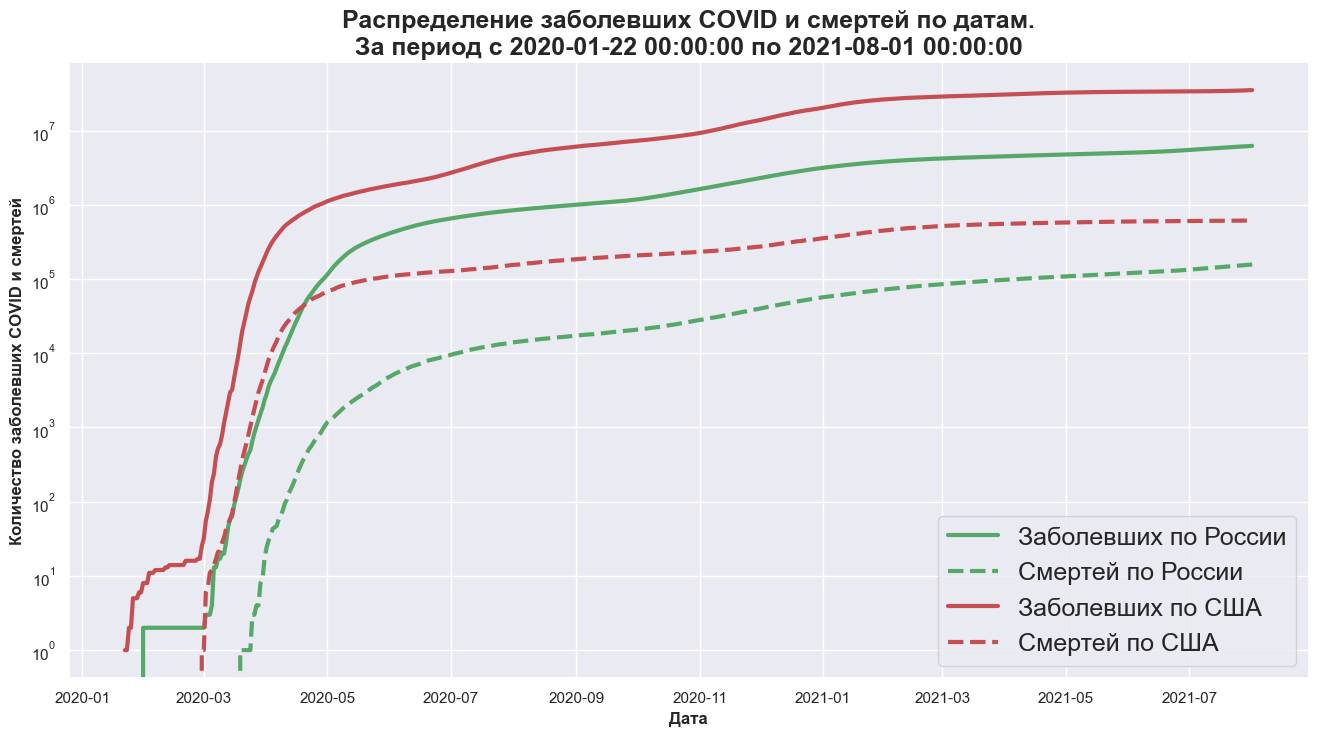

In [20]:
plt.figure(figsize=[16, 8])
plt.title(f'Распределение заболевших COVID и смертей по датам.\nЗа период с {min(df.date)} по {max(df.date)}', 
          fontsize = 18, fontweight = 'bold')
plt.xlabel('Дата', fontweight = 'bold')
plt.ylabel('Количество заболевших COVID и смертей', fontweight = 'bold')

plt.plot(rus['date'], rus['confirmed'], c = 'g', lw = 3, 
         label = 'Заболевших по России')
plt.plot(rus['date'], rus['deaths'], c = 'g', ls = '--', lw = 3, 
         label = 'Смертей по России')
plt.plot(us['date'], us['confirmed'], c = 'r', lw = 3, 
         label = 'Заболевших по США')
plt.plot(us['date'], us['deaths'], c = 'r', ls = '--', lw = 3, 
         label = 'Смертей по США')

plt.yscale('log')
plt.legend(prop={'size': 18})
plt.show()

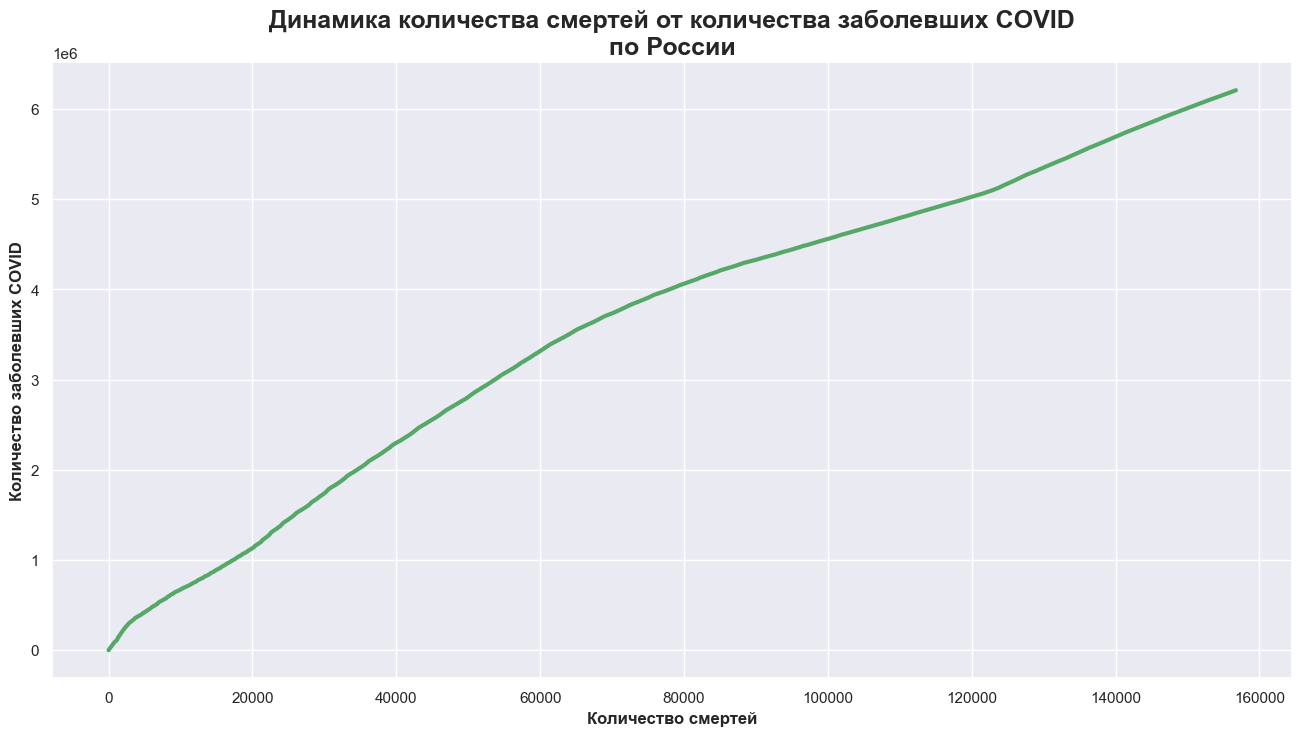

In [21]:
plt.figure(figsize=[16, 8])
plt.title('Динамика количества смертей от количества заболевших COVID\nпо России', fontsize = 18, fontweight = 'bold')
plt.xlabel('Количество смертей', fontweight = 'bold')
plt.ylabel('Количество заболевших COVID', fontweight = 'bold')
plt.plot(rus['deaths'], rus['confirmed'], c = 'g', lw = 3)
plt.show()

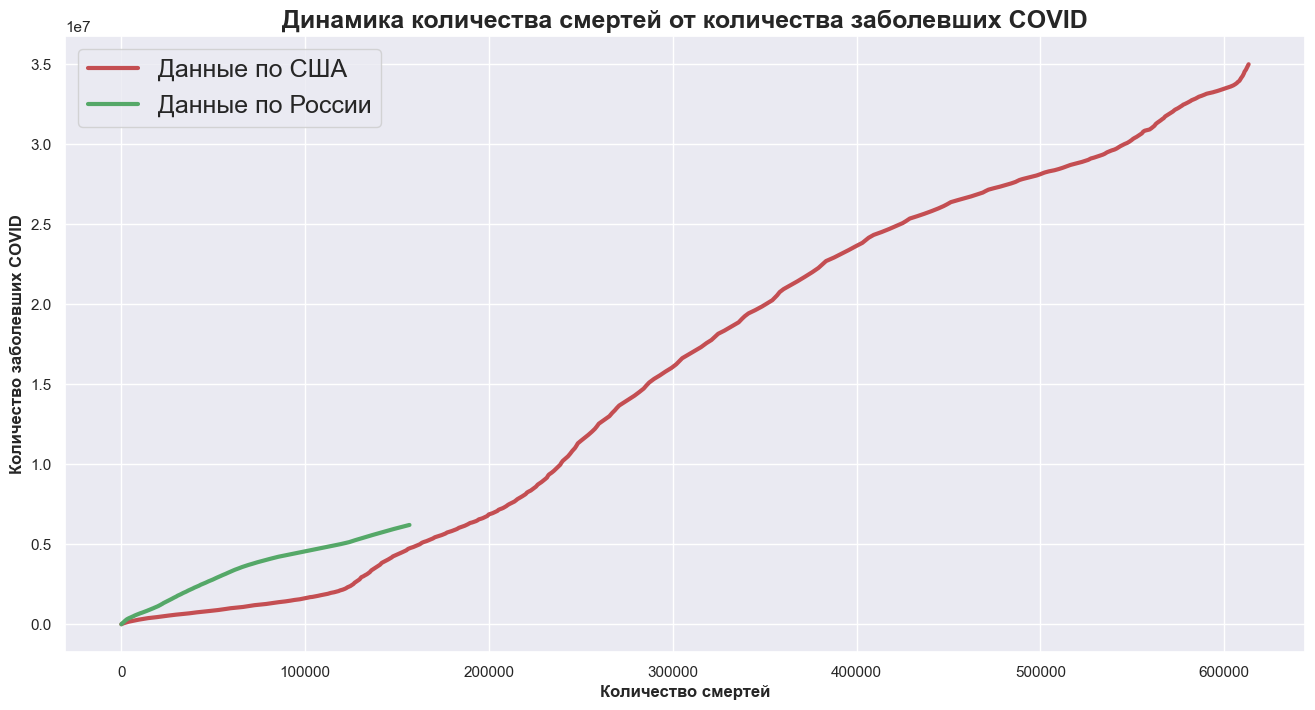

In [22]:
plt.figure(figsize=[16, 8])
plt.title('Динамика количества смертей от количества заболевших COVID', fontsize = 18, fontweight = 'bold')
plt.xlabel('Количество смертей', fontweight = 'bold')
plt.ylabel('Количество заболевших COVID', fontweight = 'bold')
plt.plot(us['deaths'], us['confirmed'], c = 'r', lw = 3, 
         label = 'Данные по США')
plt.plot(rus['deaths'], rus['confirmed'], c = 'g', lw = 3, 
         label = 'Данные по России')
plt.legend(prop={'size': 18})
plt.show()

---

Из графиков выше мы явно видим, что в США болезнь протекала на много хуже, чем в России.

Так же можно сделать вывод, что смертность в США была намного больше чем в России при одинаковом количестве заболевших.

---

In [23]:
df[(df['confirmed'] > 100000) & (df['confirmed'] < 110000)]

,date,country,confirmed,deaths
131,2020-03-27,US,105383.0,2304.0
198,2020-04-30,Russia,106498.0,1073.0


In [24]:
df[(df['confirmed'] > 220000) & (df['confirmed'] < 230000)]

,date,country,confirmed,deaths
141,2020-04-01,US,224587.0,6637.0
220,2020-05-11,Russia,221344.0,2009.0


In [25]:
df[(df['confirmed'] > 320000) & (df['confirmed'] < 330000)]

,date,country,confirmed,deaths
147,2020-04-04,US,321502.0,11167.0
242,2020-05-22,Russia,326448.0,3249.0


In [26]:
df[(df['confirmed'] > 406000) & (df['confirmed'] < 420000)]

,date,country,confirmed,deaths
153,2020-04-07,US,413566.0,17106.0
262,2020-06-01,Russia,414328.0,4849.0


In [27]:
df[(df['confirmed'] > 515000) & (df['confirmed'] < 520000)]

,date,country,confirmed,deaths
159,2020-04-10,US,515146.0,23662.0
286,2020-06-13,Russia,519458.0,6819.0


In [28]:
df[(df['confirmed'] > 6200000) & (df['confirmed'] < 6210000)]

,date,country,confirmed,deaths
453,2020-09-04,US,6204443.0,187698.0
1114,2021-08-01,Russia,6207513.0,156726.0


In [29]:
187698.0 / 156726.0

1.1976187741663795

---

Для более детального рассмотрения, были сделаны выборки по одинаковому количеству больных.

### Теперь рассмотрев все данные, можно сделать следующие выводы:

* В США болезнь протекала на много хуже, чем в России;

* При факте, что население в США больше в 2.26 раза - количество больных и смертей в США больше в 5 – 10 раз чем в России на одинаковые даты;

* По количеству заболевших США опережало Россию, вначале на 1 -2 месяца, а 6 200 000 больных в США было в сентябре 2020, когда в России это было в августе 2021, т.е. разница составила аж 11 месяцев;

* Соотношение заболевших COVID к смертям в США это больше в 2 – 3 чем в России.

---

# 13. Постройте модель линейной регрессии по смертям от заболеваемости и вычислите прогноз количества смертей в России для 25 000 000 случаев заражений (примечание: сформируйте выборку по России, выделите признак и целевую переменную [используем 100% данных для обучения], постройте прогноз смертей для 25 000 000 заболевших [поможет метод predict], сделайте выводы по полученному прогнозу)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [31]:
lin_0 = LinearRegression()

---

Перед прогнозированием смертей для 25 000 000 заболевших сначала посмотрим какие показатели показывает модель.

Для этого будем использовать кросс валидацию и перемешаем все данные.

---

In [32]:
rus1 = rus.sample(frac=1)

In [33]:
rus1

,date,country,confirmed,deaths
976,2021-05-24,Russia,4952412.0,116812.0
298,2020-06-19,Russia,568292.0,7831.0
940,2021-05-06,Russia,4799872.0,110366.0
952,2021-05-12,Russia,4849044.0,112410.0
646,2020-12-10,Russia,2546113.0,44769.0
...,...,...,...,...
242,2020-05-22,Russia,326448.0,3249.0
402,2020-08-10,Russia,890799.0,14973.0
764,2021-02-07,Russia,3923461.0,75430.0
488,2020-09-22,Russia,1111157.0,19575.0


In [34]:
X = rus1[['confirmed']]

In [35]:
Y = rus1['deaths']

In [36]:
scoring=['r2',
         'explained_variance',
         'max_error',
         'neg_mean_absolute_error',
         'neg_root_mean_squared_error',
         'neg_mean_squared_error'
        ]

pd.DataFrame(cross_validate(lin_0, X, Y, cv=7, scoring = scoring))

,fit_time,score_time,test_r2,test_explained_variance,test_max_error,test_neg_mean_absolute_error,test_neg_root_mean_squared_error,test_neg_mean_squared_error
0,0.009238,0.003000,0.978396,0.979015,-14449.513292,-5099.282388,-6544.745544,-4.283369e+07
1,0.001999,0.002000,0.983040,0.983280,-16930.312353,-4845.891270,-6589.799444,-4.342546e+07
2,0.002001,0.002000,0.983232,0.985556,-16987.872204,-5343.672952,-6884.678664,-4.739880e+07
3,0.001999,0.002000,0.973975,0.975215,-13386.952514,-5424.644623,-6837.745044,-4.675476e+07
4,0.001000,0.002000,0.982132,0.982565,-16268.013320,-4990.182435,-6583.311097,-4.333998e+07
5,0.001001,0.001998,0.979789,0.979839,-13243.032959,-5463.200718,-6674.989036,-4.455548e+07
6,0.001001,0.001082,0.972077,0.973051,-15191.849557,-6349.529066,-7632.471594,-5.825462e+07


In [37]:
pd.DataFrame(cross_validate(lin_0, X, Y, cv=7, scoring = scoring)).describe()

,fit_time,score_time,test_r2,test_explained_variance,test_max_error,test_neg_mean_absolute_error,test_neg_root_mean_squared_error,test_neg_mean_squared_error
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000e+00
mean,0.001893,0.002110,0.978949,0.979789,-15208.220886,-5359.486207,-6821.105775,-4.665183e+07
std,0.003379,0.002990,0.004438,0.004473,1581.708208,493.846856,380.877687,5.409005e+06
min,0.000000,0.000000,0.972077,0.973051,-16987.872204,-6349.529066,-7632.471594,-5.825462e+07
25%,0.000000,0.000000,0.976185,0.977115,-16599.162836,-5443.922670,-6861.211854,-4.707678e+07
50%,0.000000,0.001418,0.979789,0.979839,-15191.849557,-5343.672952,-6674.989036,-4.455548e+07
75%,0.001999,0.002495,0.982586,0.982922,-13918.232903,-5044.732412,-6586.555270,-4.338272e+07
max,0.009253,0.008358,0.983232,0.985556,-13243.032959,-4845.891270,-6544.745544,-4.283369e+07


In [38]:
lin_0.fit(X, Y)

LinearRegression()

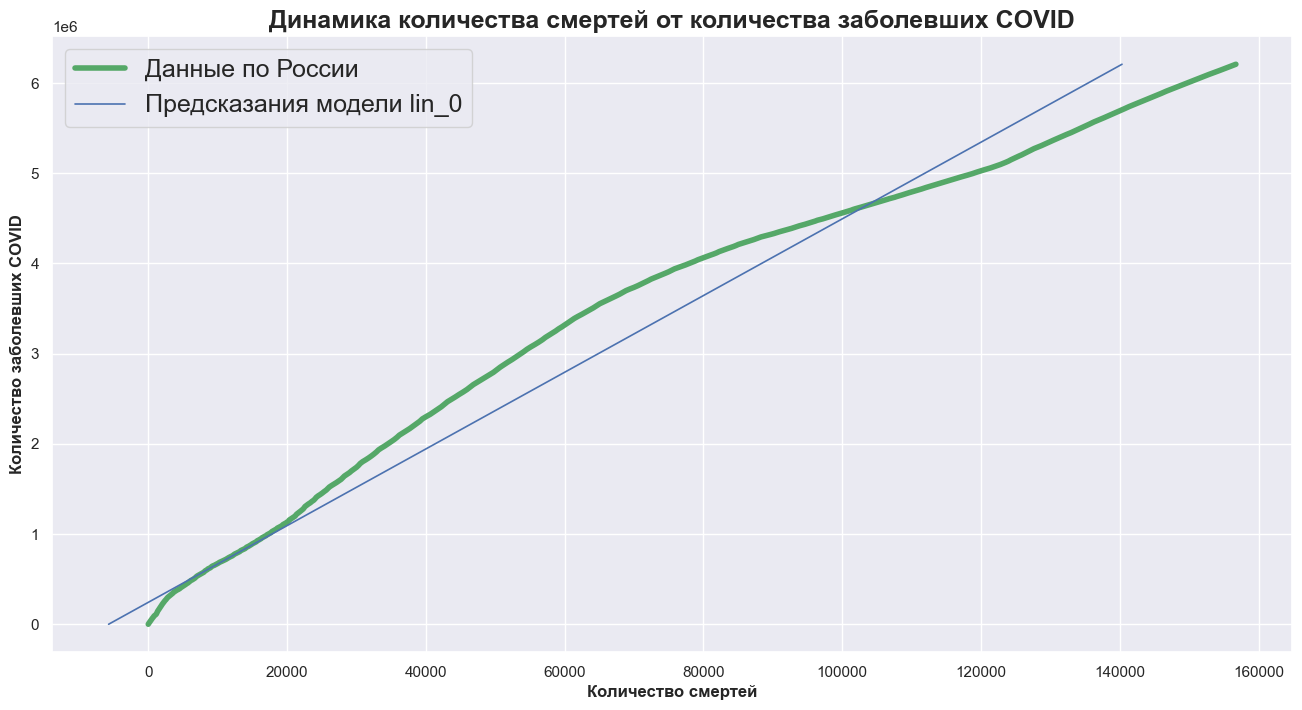

In [39]:
plt.figure(figsize=[16, 8])
plt.title('Динамика количества смертей от количества заболевших COVID', fontsize = 18, fontweight = 'bold')
plt.xlabel('Количество смертей', fontweight = 'bold')
plt.ylabel('Количество заболевших COVID', fontweight = 'bold')

plt.plot(rus['deaths'], rus['confirmed'], c = 'g', lw = 4, 
         label = 'Данные по России')

plt.plot(lin_0.predict(rus[['confirmed']]), rus['confirmed'], lw = 1.2, 
         label = 'Предсказания модели lin_0')

plt.legend(prop={'size': 18})
plt.show()

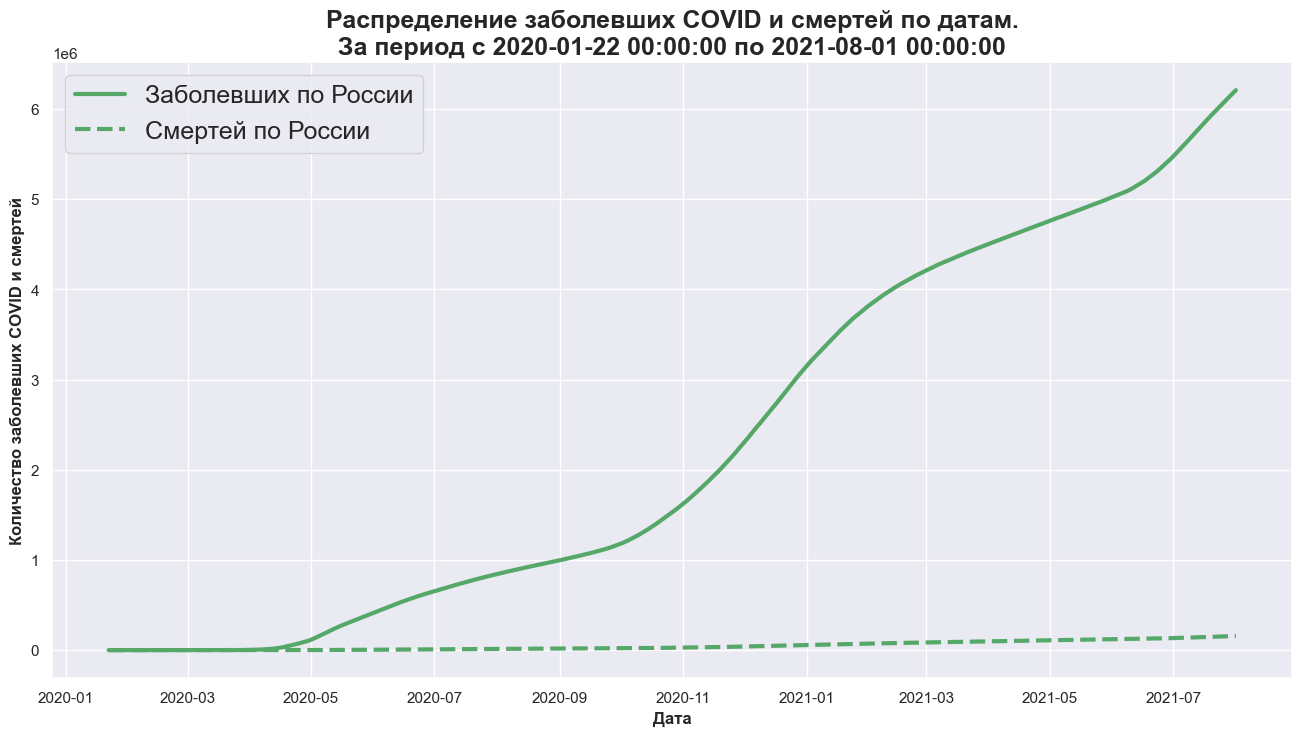

In [40]:
plt.figure(figsize=[16, 8])
plt.title(f'Распределение заболевших COVID и смертей по датам.\nЗа период с {min(df.date)} по {max(df.date)}', 
          fontsize = 18, fontweight = 'bold')
plt.xlabel('Дата', fontweight = 'bold')
plt.ylabel('Количество заболевших COVID и смертей', fontweight = 'bold')

plt.plot(rus['date'], rus['confirmed'], c = 'g', lw = 3, 
         label = 'Заболевших по России')
plt.plot(rus['date'], rus['deaths'], c = 'g', ls = '--', lw = 3, 
         label = 'Смертей по России')

plt.legend(prop={'size': 18})
plt.show()

---

Как мы можем видеть на графиках выше COVID протекает далеко не по линейному закону.

Для улучшения показателей модели и получению более актуальных данных попробуем обучить модель на последних данных – начиная с 2020-12-01.

---

In [41]:
lin_1 = LinearRegression()

In [42]:
rus1 = rus[rus['date'] > pd.to_datetime('2020-12-01')].sample(frac=1)

In [43]:
X1 = rus1[['confirmed']]

In [44]:
Y1 = rus1['deaths']

In [45]:
scoring=['r2',
         'explained_variance',
         'max_error',
         'neg_mean_absolute_error',
         'neg_root_mean_squared_error',
         'neg_mean_squared_error'
        ]

pd.DataFrame(cross_validate(lin_1, X1, Y1, cv=7, scoring = scoring))

,fit_time,score_time,test_r2,test_explained_variance,test_max_error,test_neg_mean_absolute_error,test_neg_root_mean_squared_error,test_neg_mean_squared_error
0,0.000000,0.000000,0.983414,0.983485,-9504.468318,-3705.454120,-4319.558266,-1.865858e+07
1,0.012164,0.002721,0.979515,0.982749,-6164.330922,-3438.280070,-3860.857048,-1.490622e+07
2,0.000000,0.000000,0.987948,0.987971,-6995.691440,-3084.762653,-3481.667746,-1.212201e+07
3,0.000000,0.000000,0.975643,0.976578,-11837.188613,-3318.524773,-4387.225129,-1.924774e+07
4,0.000000,0.000000,0.985982,0.986008,-10040.328727,-3101.160138,-3664.835734,-1.343102e+07
5,0.000000,0.013849,0.983727,0.983729,-10689.873330,-3357.078854,-4150.560806,-1.722716e+07
6,0.000974,0.002999,0.983248,0.983325,-8765.605453,-2956.240640,-3555.171588,-1.263925e+07


In [46]:
pd.DataFrame(cross_validate(lin_1, X1, Y1, cv=7, scoring = scoring)).describe().round(3)

,fit_time,score_time,test_r2,test_explained_variance,test_max_error,test_neg_mean_absolute_error,test_neg_root_mean_squared_error,test_neg_mean_squared_error
count,7.000,7.000,7.000,7.000,7.000,7.000,7.000,7.000000e+00
mean,0.002,0.002,0.983,0.983,-9142.498,-3280.214,-3917.125,-1.546171e+07
std,0.003,0.002,0.004,0.004,2008.862,254.431,370.785,2.921844e+06
min,0.000,0.000,0.976,0.977,-11837.189,-3705.454,-4387.225,-1.924774e+07
25%,0.001,0.002,0.981,0.983,-10365.101,-3397.679,-4235.060,-1.794287e+07
50%,0.001,0.002,0.983,0.983,-9504.468,-3318.525,-3860.857,-1.490622e+07
75%,0.001,0.002,0.985,0.985,-7880.648,-3092.961,-3610.004,-1.303513e+07
max,0.009,0.006,0.988,0.988,-6164.331,-2956.241,-3481.668,-1.212201e+07


In [47]:
pd.DataFrame(cross_validate(lin_0, X, Y, cv=7, scoring = scoring)).describe().round(3)

,fit_time,score_time,test_r2,test_explained_variance,test_max_error,test_neg_mean_absolute_error,test_neg_root_mean_squared_error,test_neg_mean_squared_error
count,7.000,7.000,7.000,7.000,7.000,7.000,7.000,7.000000e+00
mean,0.001,0.003,0.979,0.980,-15208.221,-5359.486,-6821.106,-4.665183e+07
std,0.001,0.003,0.004,0.004,1581.708,493.847,380.878,5.409005e+06
min,0.000,0.000,0.972,0.973,-16987.872,-6349.529,-7632.472,-5.825462e+07
25%,0.000,0.001,0.976,0.977,-16599.163,-5443.923,-6861.212,-4.707678e+07
50%,0.001,0.002,0.980,0.980,-15191.850,-5343.673,-6674.989,-4.455548e+07
75%,0.002,0.003,0.983,0.983,-13918.233,-5044.732,-6586.555,-4.338272e+07
max,0.002,0.010,0.983,0.986,-13243.033,-4845.891,-6544.746,-4.283369e+07


---

Обучение модели на последних данных дало результат, если рассматривать средние значения после кросс валидации мы видим следующие показатели:
* R2		|	было 0.980		|	стало 0.982
* max_error	|	было -15490.947	|	стало -8973.666
* MAE		|	было -5330.110	|	стало -3283.368
* RMSE		|	было -6769.640	|	стало -3928.951

---

In [48]:
lin_1.fit(X1, Y1)

LinearRegression()

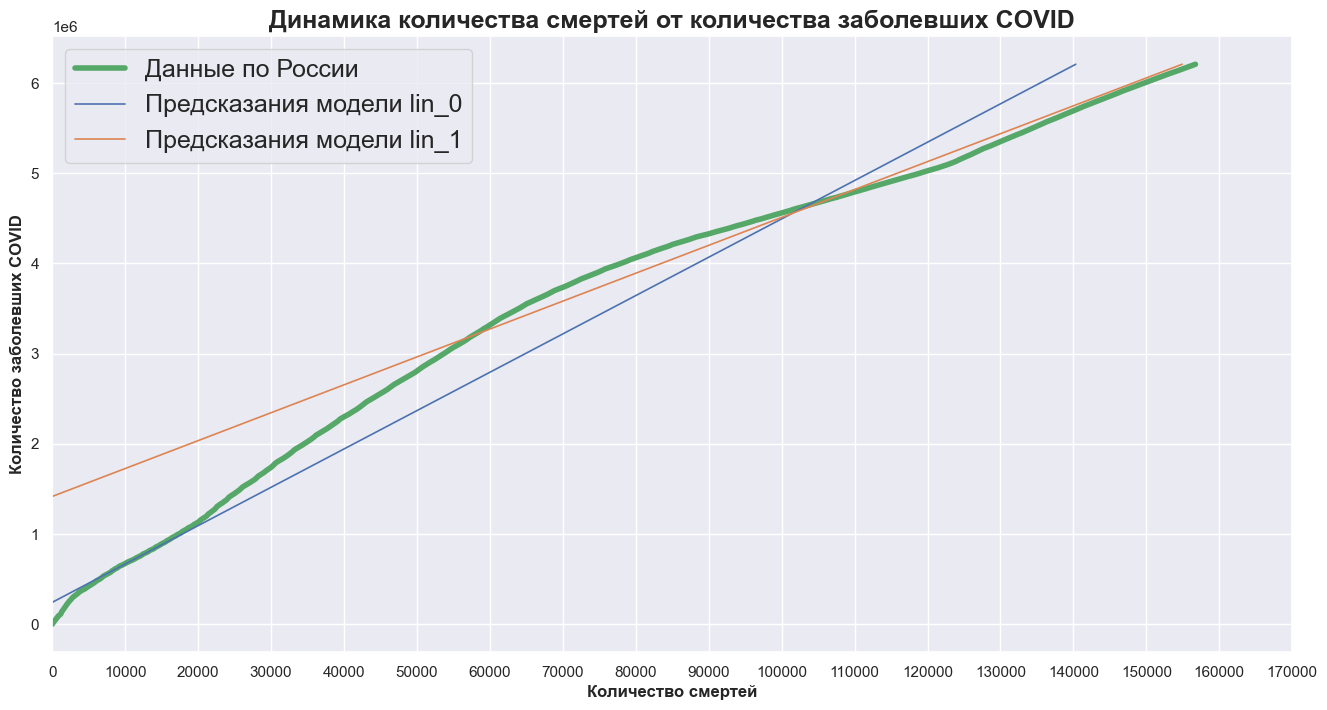

In [49]:
plt.figure(figsize=[16, 8])
plt.title('Динамика количества смертей от количества заболевших COVID', fontsize = 18, fontweight = 'bold')
plt.xlabel('Количество смертей', fontweight = 'bold')
plt.ylabel('Количество заболевших COVID', fontweight = 'bold')

plt.plot(rus['deaths'], rus['confirmed'], c = 'g', lw = 4, 
         label = 'Данные по России')

plt.plot(lin_0.predict(rus[['confirmed']]), rus['confirmed'], lw = 1.2, 
         label = 'Предсказания модели lin_0')

plt.plot(lin_1.predict(rus[['confirmed']]), rus['confirmed'], lw = 1.2, 
         label = 'Предсказания модели lin_1')
plt.xticks(range(0, 175001, 10000))
plt.xlim(0, 170000)
plt.legend(prop={'size': 18})
plt.show()

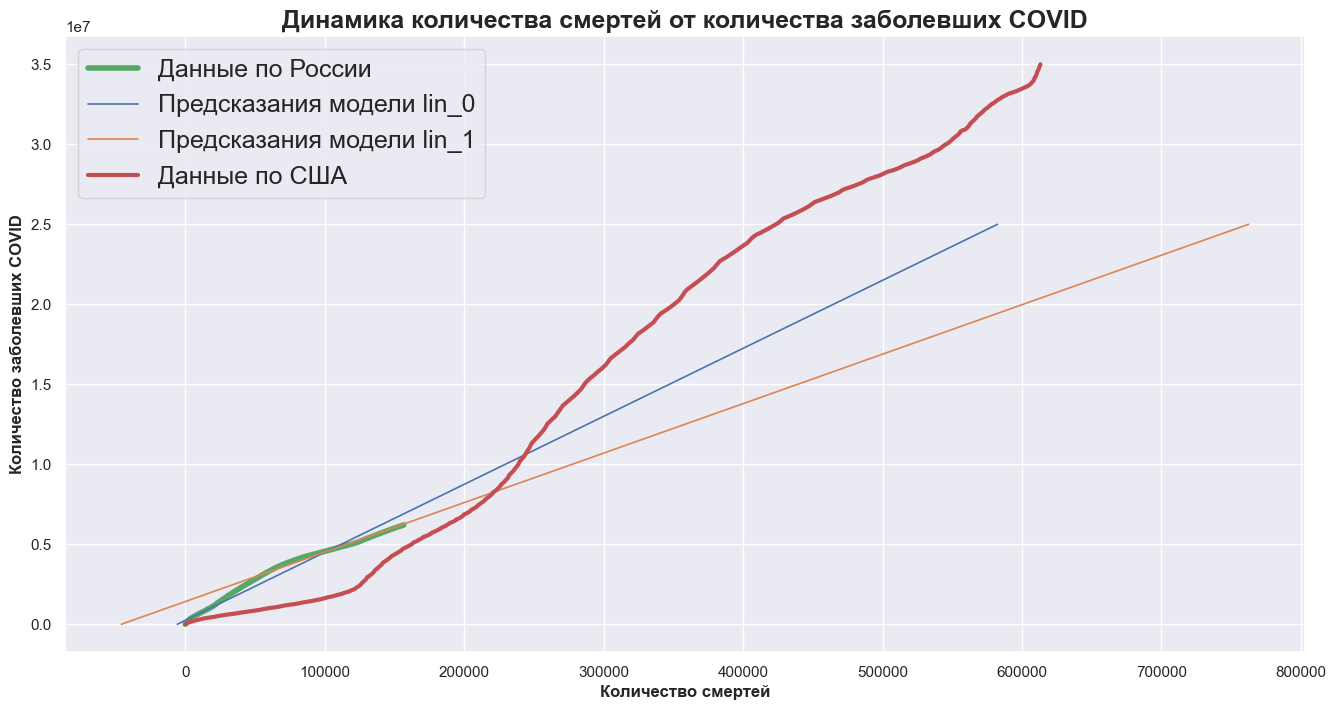

In [50]:
plt.figure(figsize=[16, 8])
plt.title('Динамика количества смертей от количества заболевших COVID', fontsize = 18, fontweight = 'bold')
plt.xlabel('Количество смертей', fontweight = 'bold')
plt.ylabel('Количество заболевших COVID', fontweight = 'bold')

plt.plot(rus['deaths'], rus['confirmed'], c = 'g', lw = 4, 
         label = 'Данные по России')

plt.plot(lin_0.predict(pd.DataFrame(range(0, 25000001, 10000))), range(0, 25000001, 10000), lw = 1.2, 
         label = 'Предсказания модели lin_0')

plt.plot(lin_1.predict(pd.DataFrame(range(0, 25000001, 10000))), range(0, 25000001, 10000), lw = 1.2, 
         label = 'Предсказания модели lin_1')

plt.plot(us['deaths'], us['confirmed'], c = 'r', lw = 3, 
         label = 'Данные по США')

plt.legend(prop={'size': 18})
plt.show()

---

По графикам также видно, что модель lin_1 более точно предсказывает последние данные по выборке.

Теперь сделаем предсказания для 25 000 000 болезней.

---

In [51]:
int(lin_0.predict([[25_000_000]])[0])

582420

In [52]:
int(lin_1.predict([[25_000_000]])[0])

762516

In [53]:
df[(df['confirmed'] > 25_000_000) & (df['confirmed'] < 25100000)]

,date,country,confirmed,deaths
735,2021-01-23,US,25074852.0,425043.0


In [54]:
int(df['deaths'][735])

425043

In [55]:
int(425043 / 2)

212521

In [56]:
int(425043 / 3)

141681

---

### Вывод:

Для предсказания количества смертей от заболевших COVID мы обучили две линейные модели lin_0 (обучена на всех данных) и lin_1 (обучена на последних данных начиная с 2020-12-01).

В итоге предсказания для 25 000 000 болезней, следующие:

* Для модели lin_0 - 582 тысячи смертей;
* Для модели lin_1 - 762 тысячи смертей;

Из сформированного вывода выше - соотношение заболевших COVID к смертям в США больше в 2 – 3 чем в России.

Мы можем самостоятельно сделать следующий прогноз, т.к. количество смертей в США для 25 000 000 болезней нам известно это 425 тысяч, то: соответственно в России должно быть от 141 тыс. до 212 тыс. смертей.

А наши линейные модели дали прогнозы в 582 тыс. и 762 тыс., что имеет очень большую разницу.

### Соответственно можно сделать следующий вывод:

* Смертность от COVID распределяется далеко не по линейному закону;

* Для подобного прогнозирования необходимо намного больше параметром, не только количество заболевших; 

* Необходимо учитывать намного больше параметров влияющих на смертность.

---

# 14. Дополните шаблон презентации отдельными слайдами с информацией по построению модели, получению прогноза и рекомендациями для бизнеса с учётом полученной информации (создайте разделы: “Построение модели” и “Рекомендации для бизнеса”).

Презентация в файле COVID.pdf